Standard format for human medical imaging is DICOM format - [DICOM® (Digital Imaging and Communications in Medicine)](https://www.dicomstandard.org/), which is "the international standard to transmit, store, retrieve, print, process, and display medical imaging information. DICOM®: makes medical imaging information interoperable"

AND

that is the same format used in this competition


Objectives:

### [Exploration](#exploration)

#### - [A. Loading images](#loading_images)
#### - [B. Plotting images](#visualizing)
#### - [C. N-D Images](#nd_images)
#### - [D. Advanced Plotting](#advanced_plotting)

In [47]:
import numpy as np
import pandas as pd
import os
import imageio
import matplotlib.pyplot as plt
import scipy
import glob
from IPython.display import Image

<a id='exploration'></a>

# Exploration
Here will look at some methods to explore biomedical data

<a id='loading_images'></a>

## A. Loading images

Lets load and plot images.
For this let select a patient

In [48]:
root_dir = "/kaggle/input/osic-pulmonary-fibrosis-progression"
train_dir = os.path.join(root_dir,'train')
test_dir = os.path.join(root_dir,'test')

In [49]:
sel_pat_id = os.listdir(train_dir)[0]
sel_pat_id_path = os.path.join(train_dir,os.listdir(train_dir)[0])
sel_dcm_img = os.listdir(sel_pat_id_path)[0]
sel_dcm_img_path = os.path.join(sel_pat_id_path, sel_dcm_img)
print("Selected dcm file: {}".format(sel_dcm_img_path))

Selected dcm file: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/137.dcm


In [50]:
# Lets imagio package to read DICOM files
# Its imread() function will take a single file and load it as an image object
im = imageio.imread(sel_dcm_img_path)

In [51]:
# data read as n image object - a numpy array (now this is a format we are familiar with)
print("Type of object: {}".format(type(im)))
im

Type of object: <class 'imageio.core.util.Array'>


Array([[ -829,  -830,  -999, ..., -1024, -1024, -1024],
       [-1024,  -953,  -802, ..., -1024, -1024, -1024],
       [ -978, -1024,  -885, ..., -1024, -1024, -1024],
       ...,
       [  207,   253,    47, ...,  -882, -1024,  -777],
       [  420,   263,   157, ...,  -614,  -977, -1024],
       [  211,   -38,   -20, ..., -1024,  -942,  -927]], dtype=int16)

Images are always acquired in a specific context => 
### Metadata 
helps define/articulate this context i.e.

a. it gives information about the patient  (name, age, sex etc.)

b. also provides details about the who, what , when, where and how of image acquisition.
e.g. shape of image, modality ('CT', 'MRI' - here it is 'CT') 

We can access the metadata using imageio as below.

In [52]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPInstanceUID', '2.25.54870549743787326149757258476993295366'),
      ('Modality', 'CT'),
      ('PatientName', 'ID00123637202217151272140'),
      ('PatientID', 'ID00123637202217151272140'),
      ('PatientSex', ''),
      ('StudyInstanceUID', '2.25.38778767280413869945794368039317784752'),
      ('SeriesInstanceUID', '2.25.113012581411220964766062095841856289827'),
      ('InstanceNumber', 137),
      ('ImagePositionPatient', (-135.598389, -20.5262623, -155.5)),
      ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)),
      ('SamplesPerPixel', 1),
      ('Rows', 512),
      ('Columns', 512),
      ('PixelSpacing', (0.61328125, 0.61328125)),
      ('BitsAllocated', 16),
      ('BitsStored', 12),
      ('HighBit', 11),
      ('PixelRepresentation', 0),
      ('RescaleIntercept', -1024.0),
      ('RescaleSlope', 1.0),
      ('PixelData',
       b'Data converted to numpy array, raw data removed to preserve memory'),
 

In [53]:
print("Available metadata attributes:")
print(im.meta.keys())
print("Patient ID: {}".format(im.meta['PatientID']))

# Lets do a simple check to check whether infromation from DICOM and 
assert im.meta['PatientID'] == sel_pat_id

assert im.meta['Rows'] == im.shape[0]
assert im.meta['Columns'] == im.shape[1]

assert im.meta['shape'] == im.shape

Available metadata attributes:
odict_keys(['TransferSyntaxUID', 'SOPInstanceUID', 'Modality', 'PatientName', 'PatientID', 'PatientSex', 'StudyInstanceUID', 'SeriesInstanceUID', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Patient ID: ID00123637202217151272140


In [54]:
im.shape

(512, 512)

<a id='visualizing'></a>

## B. Plotting images


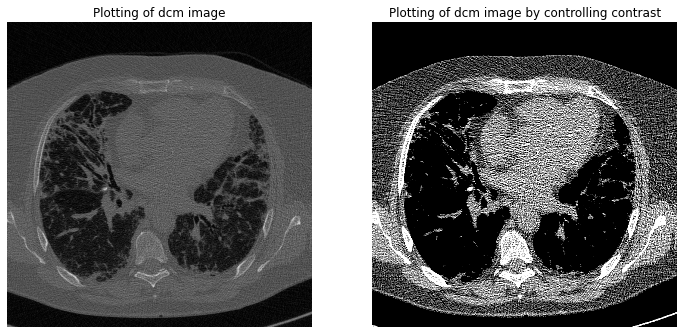

In [55]:
# Lets display image in grayscale
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),squeeze=False)
ax[0,0].imshow(im, cmap='gray')
ax[0,0].axis('off')
ax[0,0].set_title('Plotting of dcm image')



ax[0,1].imshow(im, cmap='gray',vmin=-200, vmax=200)
ax[0,1].axis('off')
ax[0,1].set_title('Plotting of dcm image by controlling contrast')

plt.show()

<a id='nd_images'></a>

## C. N-D Images

Let's first understand N-dimensional image data
placeholder to put images for stacking


Stacking should be done as:
vol[plane, row, col]

In [56]:
im1 = imageio.imread(glob.glob(sel_pat_id_path+"/*")[0])
im2 = imageio.imread(glob.glob(sel_pat_id_path+"/*")[1])
im3 = imageio.imread(glob.glob(sel_pat_id_path+"/*")[2])
# 3D volumne
vol_img = np.stack([im1,im2,im3])
vol_img.shape


(3, 512, 512)

In [57]:
# Lets read all images
vol = imageio.volread(sel_pat_id_path)

Reading DICOM (examining files): 1/258 files (0.449/258 files (19.099/258 files (38.4150/258 files (58.1%199/258 files (77.1%248/258 files (96.1%258/258 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 2/258  (0.8%62/258  (24.0%123/258  (47.7183/258  (70.9245/258  (95.0258/258  (100.0%)


In [58]:
vol.shape

(258, 512, 512)

In [59]:
# Accesibility to metadata of vol
vol.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPInstanceUID', 'Modality', 'PatientName', 'PatientID', 'PatientSex', 'StudyInstanceUID', 'SeriesInstanceUID', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

In [60]:
# Remember the image is only a representation of the physical space, its important to understand these parameters as well
# Parameter 1: Shape (we are already familiar)
# Number of elements along each axis
(n0, n1, n2) = vol.shape
(n0, n1, n2)

(258, 512, 512)

In [61]:
# Parameter 2: Sampling Rate (in mm)
# Physical space covered by each element
(d0, d1, d2) = vol.meta['sampling']
(d0, d1, d2)

(1.0, 0.61328125, 0.61328125)

In [62]:
# Parameter 3: Field of view (in mm)
# Physical space covered along each axis
(n0*d0, n1*d1, n2*d2)

(258.0, 314.0, 314.0)

<a id='advanced_plotting'></a>
## D. Advanced Plotting

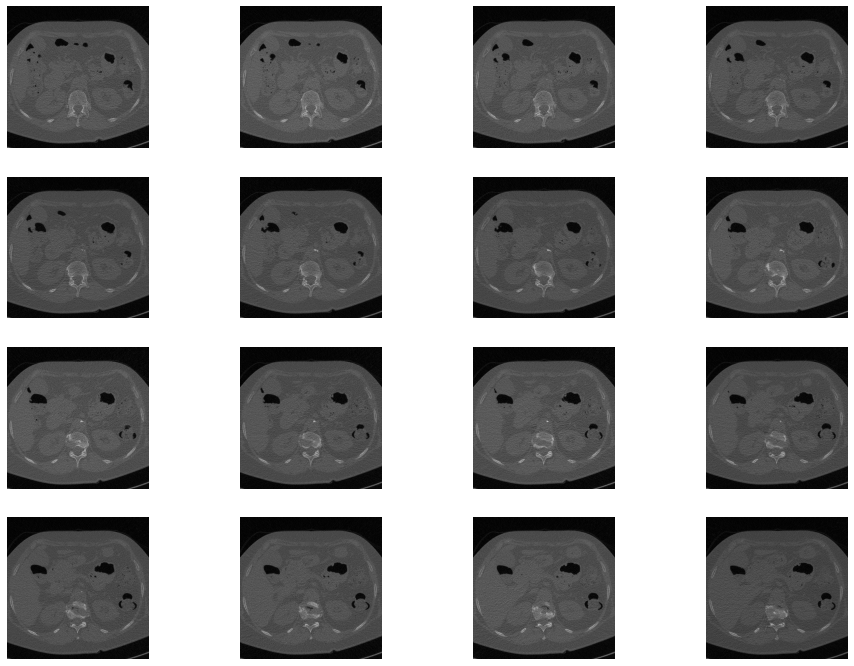

In [63]:
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize=(16,12),squeeze= False)
count=0
for r in range(4):
    for c in range(4):
        axes[r,c].imshow(vol[count,:,:],cmap="gray")
        count=count+1
        axes[r,c].axis("off")
plt.show()

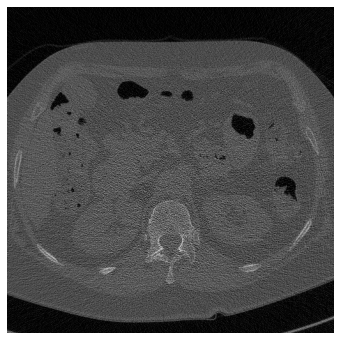

In [64]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(10,6),squeeze= False)
count=0
for r in range(16):
    for c in range(16):
        axes[0,0].imshow(vol[count,:,:],cmap="gray")
        count=count+1
        axes[0,0].axis("off")
        plt.show()


In [65]:
vol.shape[0]

258

In [70]:
# fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(10,6),squeeze= False)
# count=0
# def animate(i):    
#     axes[0,0].imshow(vol[i,:,:],cmap="gray")
#     axes[0,0].axis("off")
#     print(i)
#     #plt.show()
# anim = animation.FuncAnimation(fig, animate,frames=100, interval=5, blit=False)

scan_array = [vol[i,:,:] for i in range(vol.shape[0])]

imageio.mimsave("/tmp/gif.gif", vol, duration=0.0001)

In [71]:
Image(filename="/tmp/gif.gif", format='png')

Future Work:

Next I plan to create a notebook that explores below topics:

Masks and Filters
- Intensity destributions
- Convolutions
- Edge detection


Measurement
- Labelling
- Multi-object measurement
- Morphology

Image Comparison

- Transformations
- Resampling
- Cost functions
- Normalization